In [1]:
# Task 2 – Word Embedding & Analogy
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# 1. Load Pretrained Models
print("Loading GloVe model (fast download)...")
glove_model = api.load("glove-twitter-25")

Loading GloVe model (fast download)...
[==================================================] 100.0% 104.8/104.8MB downloaded


Loading GloVe model (fast download)...

--- Words similar to 'king' (GloVe) ---
prince: 0.9337
queen: 0.9202
aka: 0.9177
lady: 0.9163
jack: 0.9147

--- Analogy: King - Man + Woman ---
Result: meets (Score: 0.8842)


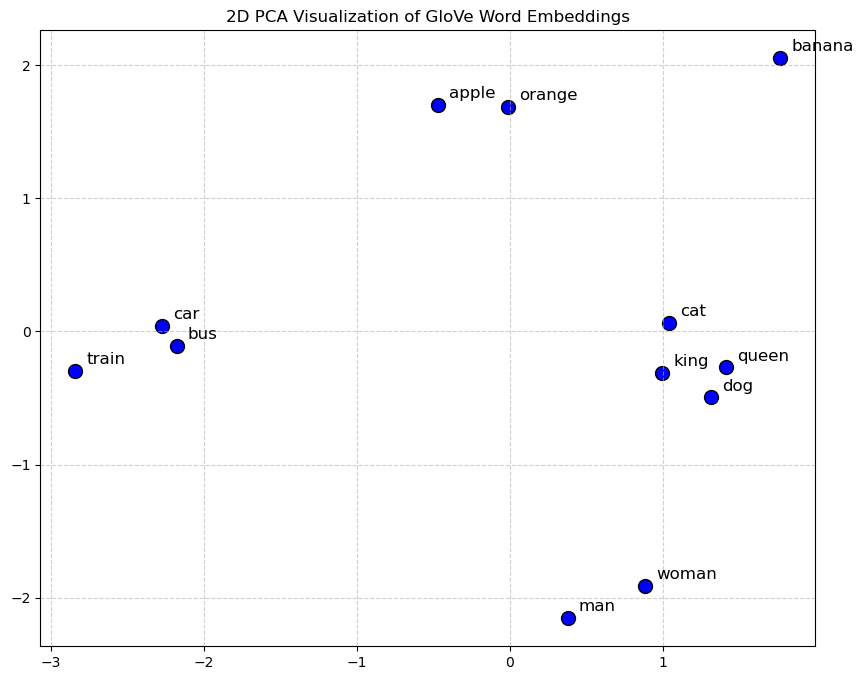

In [3]:
# 1. Load Pretrained Models
print("Loading GloVe model (fast download)...")
glove_model = api.load("glove-twitter-25")



# 2. Find Similar Words
target = "king"
print(f"\n--- Words similar to '{target}' (GloVe) ---")
for word, score in glove_model.most_similar(target, topn=5):
    print(f"{word}: {score:.4f}")

# 3. Perform Basic Analogy: king - man + woman
# This corresponds to: positive=['king', 'woman'], negative=['man']
analogy = glove_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(f"\n--- Analogy: King - Man + Woman ---")
print(f"Result: {analogy[0][0]} (Score: {analogy[0][1]:.4f})")

# 4. Visualize 10-20 Words using PCA
words = ['king', 'queen', 'man', 'woman', 'apple', 'banana', 'orange', 'dog', 'cat', 'car', 'bus', 'train']

# Extract vectors for the chosen words
vectors = [glove_model[w] for w in words]

# Reduce dimensions from 25 to 2 using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='blue', edgecolors='k', s=100)

for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(8, 5), textcoords='offset points', fontsize=12)

plt.title("2D PCA Visualization of GloVe Word Embeddings")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()